### Importing data

In [34]:
import numpy as np
import matplotlib.pyplot

cutoff = 500
test_cutoff = 100


# importing the training data
encodings = []
ages_distr = []
for i in range(1, 101):
    enc = np.load(f'bigdata/encodings/train/X{i}.npy')[:cutoff]
    ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    encodings.append(enc_i)
encodings = np.concatenate(encodings)                                  # matrix with ages column  

# importing the testing data
test_encodings = []
test_ages_distr = []
for i in range(1, 101):
    enc = np.load(f'bigdata/encodings/test/X{i}.npy')[:test_cutoff]
    test_ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    test_encodings.append(enc_i)
test_encodings = np.concatenate(test_encodings)                                  # matrix with ages column  

#separating the data
X = encodings[:,:-1]           # matrix without ages column
Y = encodings[:,-1]            # ages only

#separating the test data
X_test = test_encodings[:,:-1]           # matrix without ages column
Y_test = test_encodings[:,-1]            # ages only

### PCA

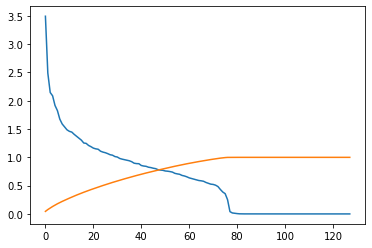

In [35]:
# finding PCA
X_avg = np.mean(X, axis=0)
n = X_avg.shape[0]
X = X - X_avg
U, S, VT = np.linalg.svd(X / np.sqrt(n), full_matrices=False)
cdS = np.cumsum(S) / np.sum(S)  # Cumulative energy
r90 = np.min(np.where(cdS > 0.9))

#plots
matplotlib.pyplot.plot(range(len(S)),S)
matplotlib.pyplot.plot(range(len(S)),cdS)

### Modeling

In [36]:
from sklearn.linear_model import LinearRegression

Mse = []
for pca_n in range(1,r90):
    Xpc = X @ VT[0:pca_n,:].T
    Xpc_test = X_test @ VT[0:pca_n,:].T
    reg = LinearRegression().fit(Xpc, Y)
    mse = np.sqrt(np.sum(np.power(reg.predict(Xpc_test) - Y_test,2))/Y_test.shape[0])
    Mse.append(mse)

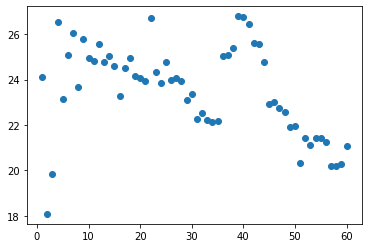

In [38]:
matplotlib.pyplot.plot(range(1,r90),Mse,"o")

In [39]:
Mse[:4]

[24.103310611153717, 18.08052893688717, 19.832422075518608, 26.535342252069125]

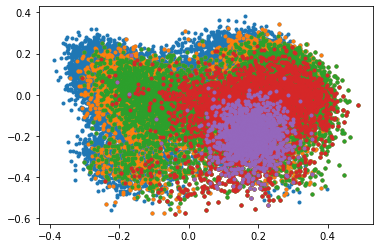

In [40]:
pca_n = 2
Xpc = X @ VT[:pca_n].T
matplotlib.pyplot.plot(Xpc[:,0],Xpc[:,1],'.')
matplotlib.pyplot.plot(Xpc[Y<40,0],Xpc[Y<40,1],'.')
matplotlib.pyplot.plot(Xpc[Y<28,0],Xpc[Y<28,1],'.')
matplotlib.pyplot.plot(Xpc[Y<16,0],Xpc[Y<16,1],'.')
matplotlib.pyplot.plot(Xpc[Y<6,0],Xpc[Y<6,1],'.')

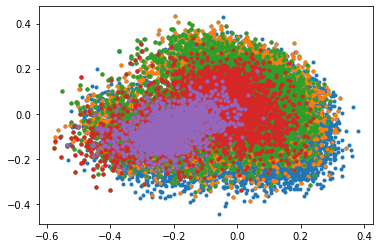

In [41]:
Xpc = X @ VT[1:3].T
matplotlib.pyplot.plot(Xpc[:,0],Xpc[:,1],'.')
matplotlib.pyplot.plot(Xpc[Y<40,0],Xpc[Y<40,1],'.')
matplotlib.pyplot.plot(Xpc[Y<28,0],Xpc[Y<28,1],'.')
matplotlib.pyplot.plot(Xpc[Y<16,0],Xpc[Y<16,1],'.')
matplotlib.pyplot.plot(Xpc[Y<6,0],Xpc[Y<6,1],'.')

In [42]:
np.mean(Xpc[Y<10],axis=0)

array([-0.17369158, -0.04577787])

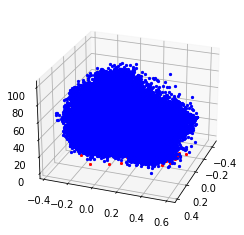

In [23]:
import matplotlib.pyplot as plt

p0, p1 = 1, 3
Xpc = X @ VT[p0:p1,:].T

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(Xpc.shape[0]):
    x, y, z = *Xpc[j], Y[j]
    
    if Y[j] < 7:
        ax.scatter(x,y,z,marker='x',color='r',s=5)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=5)

ax.view_init(25,20)
plt.show()

In [24]:
p0, p1 = 0, 2
Xpc = X @ VT[p0:p1,:].T
Xpc_test = X_test @ VT[p0:p1,:].T
reg = LinearRegression().fit(Xpc, Y)
mse = np.sqrt(np.sum(np.power(reg.predict(Xpc_test) - Y_test,2))/Y_test.shape[0])
mse

14.07285578767308

In [25]:
X2 = np.concatenate((Xpc,Xpc**2,Xpc[:,0]*Xpc[:,1]), axis=1)
Xpc_test = X_test @ VT[p0:p1,:].T
X2_test = np.concatenate((Xpc_test,Xpc_test**2), axis=1)
reg = LinearRegression().fit(X2, Y)
mse = np.sqrt(np.sum(np.power(reg.predict(X2_test) - Y_test,2))/Y_test.shape[0])
mse

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 2 has 1 dimension(s)

In [ ]:
reg.coef_

In [18]:
(Xpc[:,0]*Xpc[:,1])[0]

0.01280566800751899

In [17]:
Xpc[0]

array([0.1989007 , 0.06438222])